            ECG        EDA  Photosensor       RSP
0     -0.015869  13.196868          5.0  0.778931
1     -0.011703  13.197173          5.0  0.777588
2     -0.009766  13.197020          5.0  0.777435
3     -0.013321  13.197631          5.0  0.777557
4     -0.009583  13.196715          5.0  0.775299
...         ...        ...          ...       ...
14995 -0.007675  14.873656          5.0  1.351868
14996 -0.005203  14.873961          5.0  1.356689
14997 -0.004272  14.874266          5.0  1.361938
14998 -0.000458  14.875335          5.0  1.366821
14999  0.000244  14.874114          5.0  1.372040

[15000 rows x 4 columns]
     EDA_Raw  EDA_Clean  EDA_Tonic  EDA_Phasic  SCR_Onsets  SCR_Peaks  \
0  13.196868  13.196849  13.102238    0.094612           0          0   
1  13.197173  13.195557  13.101986    0.093571           0          0   
2  13.197020  13.194280  13.101734    0.092546           0          0   
3  13.197631  13.193032  13.101483    0.091549           0          0   
4  13.196

<AxesSubplot:>

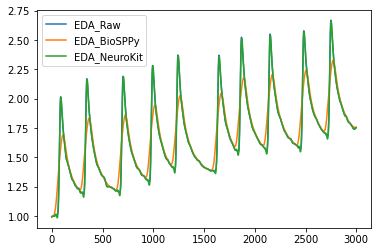

In [4]:
import neurokit2 as nk
import pandas as pd

data = nk.data("bio_eventrelated_100hz")

print(data)

df, info = nk.bio_process(eda=data["EDA"], sampling_rate=100)
print(df.head(5))

events = nk.events_find(data["Photosensor"], threshold_keep='below',event_conditions=["Negative", "Neutral", "Neutral", "Negative"])
print('\n\n',events)

epochs = nk.epochs_create(df, events, sampling_rate=100, epochs_start=-0.1, epochs_end=1.9)
analyze_epochs = nk.eda_analyze(epochs, sampling_rate=100)
analyze_epochs


data = nk.data("bio_resting_8min_100hz")
print(data.head(5))


df, info = nk.eda_process(data["EDA"], sampling_rate=100)
analyze_df = nk.eda_analyze(df, sampling_rate=100)
print(analyze_df) 



eda_signal = nk.eda_simulate(duration=5, scr_number=5, drift=0.1)
eda_cleaned = nk.eda_clean(eda_signal)
cor = nk.eda_autocor(eda_cleaned)
print(cor)


eda = nk.eda_simulate(duration=30, sampling_rate=100, scr_number=10, noise=0.01, drift=0.02)
signals = pd.DataFrame({"EDA_Raw": eda,"EDA_BioSPPy": nk.eda_clean(eda, sampling_rate=100,method='biosppy'),"EDA_NeuroKit": nk.eda_clean(eda, sampling_rate=100, method='neurokit')})
fig = signals.plot()
fig

In [28]:
eda = nk.eda_simulate(duration=15, scr_number=3)
# Process data
eda_signals, info = nk.eda_process(eda, sampling_rate=1000)
epochs = nk.epochs_create(eda_signals, events=[5000, 10000, 15000], sampling_rate=1000,epochs_start=-0.1, epochs_end=1.9)

# Analyze
nk.eda_eventrelated(epochs) 

# Example with real data
data = nk.data("bio_eventrelated_100hz")

# Process the data
df, info = nk.bio_process(eda=data["EDA"], sampling_rate=100)
events = nk.events_find(data["Photosensor"], threshold_keep='below',event_conditions=["Negative", "Neutral", "Neutral", "Negative"])
epochs = nk.epochs_create(df, events, sampling_rate=100, epochs_start=-0.1, epochs_end=6.9)
# Analyze
nk.eda_eventrelated(epochs)

,Label,Condition,Event_Onset,EDA_Peak_Amplitude,EDA_SCR,SCR_Peak_Amplitude,SCR_Peak_Amplitude_Time,SCR_RiseTime,SCR_RecoveryTime
1,1,Negative,1024,1.995617,1,3.114808,4.716881,1.74,673.0
2,2,Neutral,4957,0.409627,0,NaN,NaN,NaN,NaN
3,3,Neutral,9224,0.023944,0,NaN,NaN,NaN,NaN
4,4,Negative,12984,1.056855,1,1.675922,2.844206,1.73,477.0


{'SCR_Onsets': array([ 420, 1409, 3298, 4154]), 'SCR_Peaks': array([ 769, 1728, 3623, 4584]), 'SCR_Height': array([0.52399258, 0.68302358, 0.11133384, 0.78661684])}
{'SCR_Onsets': array([ 420, 1409, 3298, 4154]), 'SCR_Peaks': array([ 769, 1728, 3623, 4584]), 'SCR_Height': array([0.52399258, 0.68302358, 0.11133384, 0.78661684])}


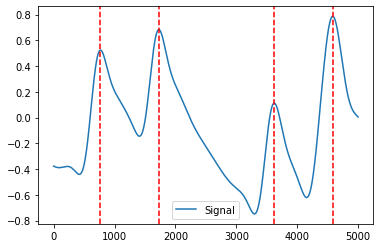

In [6]:
eda = nk.eda_phasic(eda_cleaned)
eda_phasic = eda["EDA_Phasic"].values
# Find and fix peaks
info = nk.eda_findpeaks(eda_phasic)
print(info)
info = nk.eda_fixpeaks(info)
print(info)
fig = nk.events_plot(info["SCR_Peaks"], eda_phasic)
fig